<a href="https://colab.research.google.com/github/cecilia-wanja/Football-prediction-scores/blob/master/Independent_project_week6_core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# QUESTION
Being a football analyst in a company - Mchezopesa Ltd you are tasked to accomplish the task below:

A Prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

In [0]:
import pandas as pd
#allows us to organize data in tabular form
import numpy as np
#numpy allows us to work with multi dimensional arrays
import scipy
#scipy-a python ecosystem used for mathematics, machine learning 
import matplotlib.pyplot as plt
#matplotlib-a 2D library for plotting numpy computations
import seaborn as sns
#seaborn-a python visualization based on matplotlib, helps in drawing attractive statistical graphics
import sklearn
#sklearn-used for machine learning, 
%matplotlib inline
#for visualization 
import statsmodels.api as sm
#statsmodel-used to run regression

### METRICS OF SUCCESS
1. Getting the model with the highest accuracy level.
2. 

# CONTEXT


In [0]:
#loading my dataset into a pandas dataframe
football = pd.read_csv("results.csv")

In [3]:
#Previewing our first few rows in our football results dataset
football.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [4]:
#previewing our dataset from football ranking dataset
data2 = pd.read_csv("/content/fifa_ranking.csv")
data2.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


#CLEANING 

In [5]:
#renaming the rank_date column to date so as to easen merging of the two dataframes
data2.rename(columns={"rank_date": "date"}, inplace = True)
data2.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'date'],
      dtype='object')

In [6]:
#looking at both datasets number of rows and columns
data2.shape               

(57793, 16)

In [7]:
football.shape

(40839, 9)

In [8]:
#merging football to the data2 

df_merge = pd.merge(football, data2, on='date')

df_merge.head()


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA
1,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA
2,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA
3,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA
4,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL


In [59]:
#checking for null values in our dataset
df_merge.isnull().sum()

date                       0
home_team                  0
away_team                  0
home_score                 0
away_score                 0
tournament                 0
city                       0
country                    0
neutral                    0
rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
results                    0
result_num                 0
neutral_num                0
dtype: int64

In [61]:
#checking for any duplicates in our dataset
df_merge.duplicated().sum()

33

In [0]:
#removing any duplicated data
df_merge.drop_duplicates(keep = 'first', inplace = True)

In [65]:
#checking for any duplicated data
df_merge.duplicated().sum()

0

# ANALYSIS

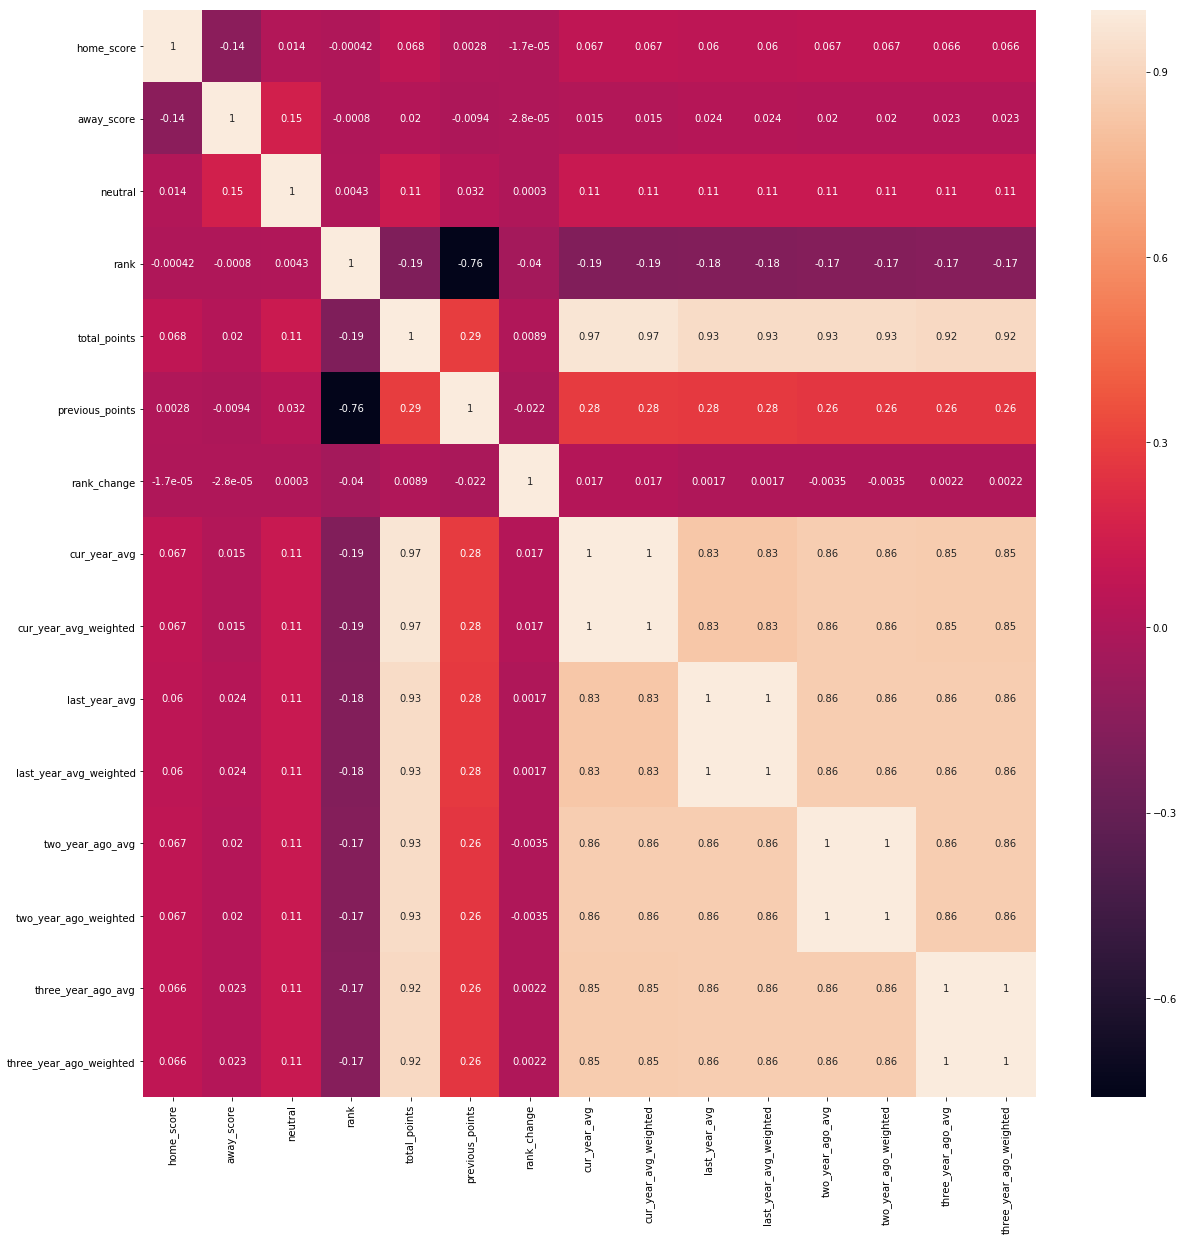

In [9]:
#correlation between columns
corr1 = df_merge.corr()
corr1
plt.figure(figsize = (20,20))
sns.heatmap(corr1,annot=True )


In [10]:
#looking at the number of rows and columns
df_merge.shape


(212831, 24)

In [66]:
#checking the sifferent statistics of each column
df_merge.describe()

,home_score,away_score,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,result_num,neutral_num
count,212798.000000,212798.000000,212798.000000,212798.000000,212798.000000,212798.000000,212798.000000,212798.000000,212798.000000,212798.000000,212798.000000,212798.000000,212798.000000,212798.000000,212798.000000,212798.000000
mean,1.682098,1.046951,101.864012,42.556582,341.234626,-0.009502,21.481468,21.481468,21.100183,10.550111,20.966169,6.289856,21.176083,4.235237,1.240035,0.184795
std,1.969885,1.257602,58.649297,163.890165,295.103291,4.537499,85.357707,85.357707,89.725337,44.862704,84.558722,25.367622,86.292406,17.258509,0.823921,0.388132
min,0.000000,0.000000,1.000000,0.000000,0.000000,-62.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,51.000000,0.000000,71.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,1.000000,102.000000,0.000000,297.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2.000000,2.000000,152.000000,0.000000,531.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
max,31.000000,12.000000,209.000000,1770.060000,1920.000000,71.000000,1126.040000,1126.040000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000,2.000000,1.000000


In [12]:
#the datatypes of each column of the merged dataset
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212831 entries, 0 to 212830
Data columns (total 24 columns):
date                       212831 non-null object
home_team                  212831 non-null object
away_team                  212831 non-null object
home_score                 212831 non-null int64
away_score                 212831 non-null int64
tournament                 212831 non-null object
city                       212831 non-null object
country                    212831 non-null object
neutral                    212831 non-null bool
rank                       212831 non-null int64
country_full               212831 non-null object
country_abrv               212831 non-null object
total_points               212831 non-null float64
previous_points            212831 non-null int64
rank_change                212831 non-null int64
cur_year_avg               212831 non-null float64
cur_year_avg_weighted      212831 non-null float64
last_year_avg              212831 non-null 

In [67]:
#checking the datatypes of each column
df_merge.dtypes

date                        object
home_team                   object
away_team                   object
home_score                   int64
away_score                   int64
tournament                  object
city                        object
country                     object
neutral                       bool
rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
results                     object
result_num                   int64
neutral_num                  int64
dtype: object

In [13]:
#showing a sample which played UEFA
df = df_merge[(df_merge['confederation'] =='UEFA')]
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA
1,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA
2,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA
3,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA
5,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,6,Republic of Ireland,IRL,0.0,54,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA


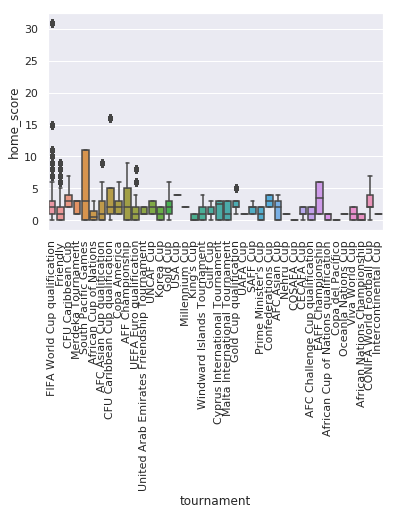

<Figure size 7.2e+06x72000 with 0 Axes>

In [94]:
#checking for outliers in our dataset
ax = sns.boxplot(x="tournament", y="home_score", data=df_merge)
plt.xticks(rotation = 90)
plt.figure(figsize = (100000,1000))
plt.show()



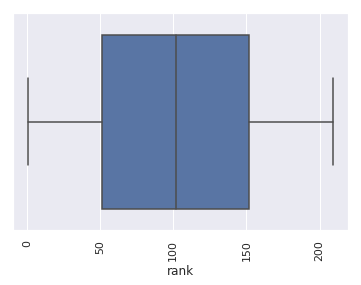

<Figure size 72000x720000 with 0 Axes>

In [84]:
ax = sns.boxplot(x="rank",data=df_merge)
plt.xticks(rotation = 90)
plt.figure(figsize = (1000,10000))
plt.show()

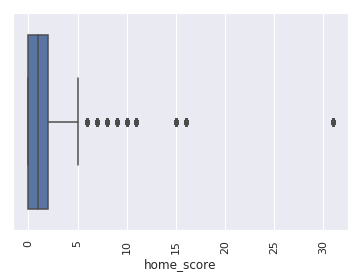

<Figure size 72000x720000 with 0 Axes>

In [86]:
ax = sns.boxplot(x="home_score", data=df_merge)
plt.xticks(rotation = 90)
plt.figure(figsize = (1000,10000))
plt.show()

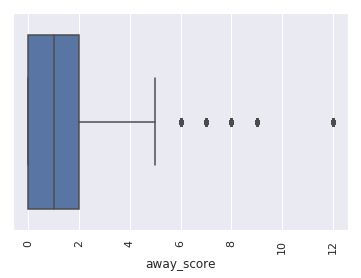

<Figure size 72000x720000 with 0 Axes>

In [87]:
ax = sns.boxplot(x="away_score", data=df_merge)
plt.xticks(rotation = 90)
plt.figure(figsize = (1000,10000))
plt.show()

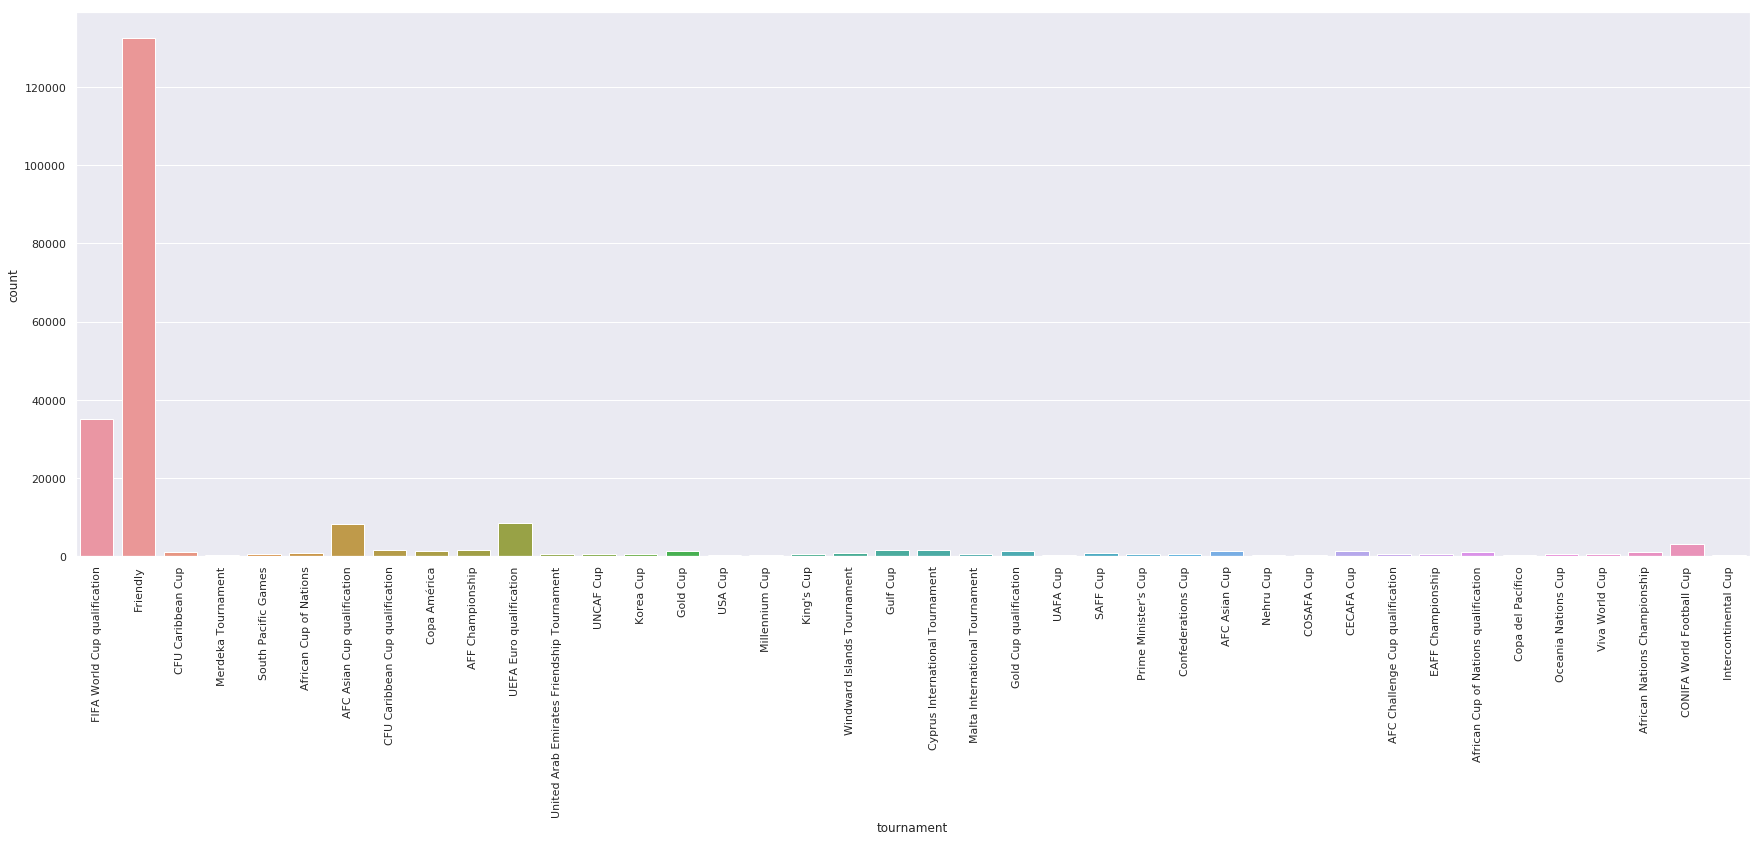

In [92]:
sns.set(style='darkgrid')
plt.figure(figsize=(30,10))
plt.xticks(rotation = 90)
sns.countplot(x='tournament', data=df_merge)


# FEATURE ENGINEERING

In [16]:
df_merge.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA
1,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA
2,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA
3,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA
4,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL


In [0]:
#creating a difference between home score and away score so as to find the winning team and losing
df_merge["results"] = df_merge['home_score']-df_merge['away_score']

In [18]:
#checking the dataset for the outcome
df_merge.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,results
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,2
1,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,2
2,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,2
3,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,2
4,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,2


In [0]:
#creating a function for the win ,loss and draw
def results(x):
 if x > 0:
   return 'win'
 elif x < 0:
   return 'loss'
 else:
   return 'draw'
#Implementing and applying our function
df_merge['results']=df_merge.results.apply(lambda x: results(x))

In [20]:
#checking if the results column has been iterated
df_merge.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,results
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,win
1,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,win
2,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,win
3,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,win
4,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,win


In [0]:
#we wish to change the results column as well as neutral to numerical values for modelling.
# Create a label (category) encoder object
from sklearn import preprocessing
le = preprocessing.LabelEncoder()


In [22]:
# Fit the encoder to the pandas column
le.fit(df_merge['results'])

LabelEncoder()

In [0]:
df_merge['result_num'] = le.transform(df_merge['results'])

In [24]:
df_merge.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,results,result_num
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,win,2
1,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,win,2
2,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,win,2
3,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,win,2
4,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,win,2


In [25]:
#changing our neutral column to numerical as well
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
#fitting the encoder
le.fit(df_merge['neutral'])
#transforming to numerical
df_merge['neutral_num'] = le.transform(df_merge['neutral'])
df_merge.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,results,result_num,neutral_num
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,win,2,0
1,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,win,2,0
2,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,win,2,0
3,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,win,2,0
4,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,win,2,0


*Distribution of the home scores and away scores*

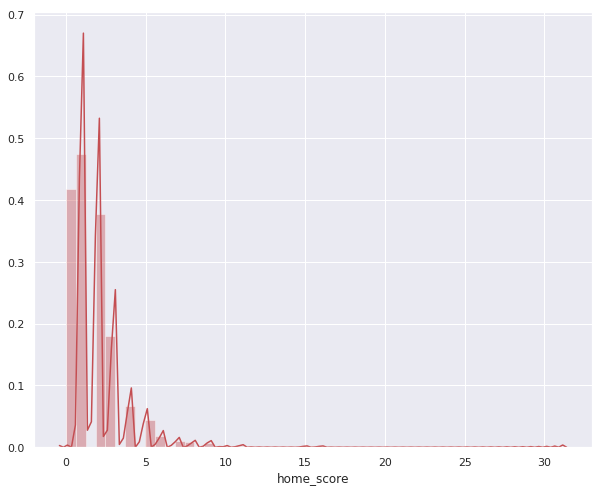

In [95]:
#the home score
plt.figure(figsize = (10,8)) 
plt.tight_layout
sns.distplot(df_merge['home_score'], color = 'r') # plotting
plt.show() # displaying


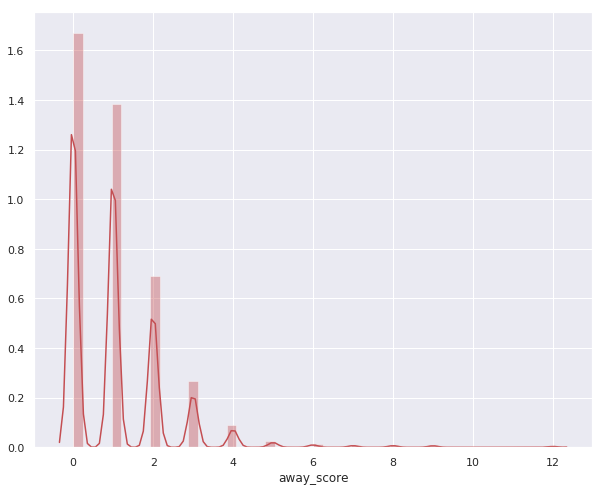

In [96]:
#the away score
plt.figure(figsize = (10,8)) 
plt.tight_layout
sns.distplot(df_merge['away_score'], color = 'r') # plotting
plt.show() # displaying

# REGRESSION

In [0]:
#our first regression
#defining our dependent variables and our independent variables.
#this concerns a prediction result between team 1 and team 2.
y = df_merge[['home_score']]
x = df_merge[['rank','result_num','neutral_num']]


**Visualization**

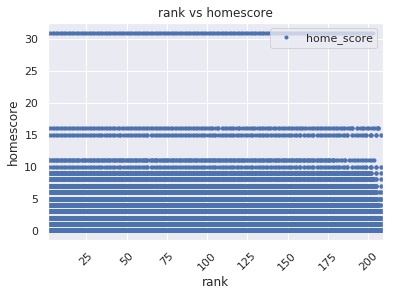

In [98]:
df_merge.plot(x = 'rank',y ='home_score',style = '.')
plt.xlabel('rank')
plt.xticks(rotation = 45)
plt.ylabel('homescore')
plt.title('rank vs homescore')
plt.show()

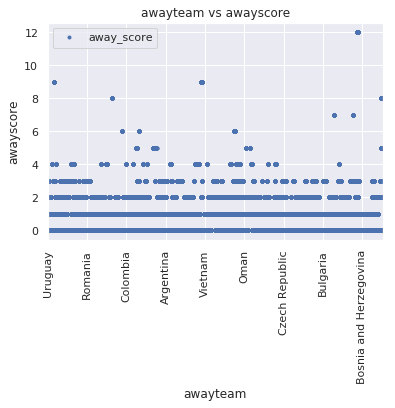

In [99]:
df_merge.plot(x = 'away_team', y = 'away_score',style = '.')
plt.xlabel('awayteam')
plt.xticks(rotation=90)
plt.ylabel('awayscore')
plt.title('awayteam vs awayscore')
plt.show()


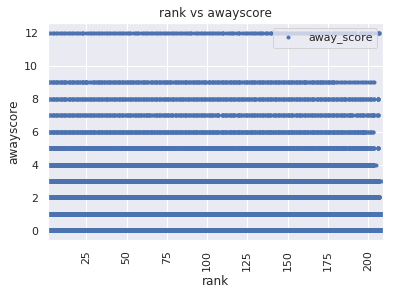

In [100]:
df_merge.plot(x = 'rank', y = 'away_score',style = '.')
plt.xlabel('rank')
plt.xticks(rotation=90)
plt.ylabel('awayscore')
plt.title('rank vs awayscore')
plt.show()


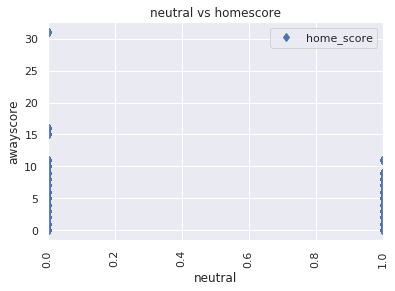

In [30]:
df_merge.plot(x = 'neutral_num', y = 'home_score',style = 'd')
plt.xlabel('neutral')
plt.xticks(rotation=90)
plt.ylabel('awayscore')
plt.title('neutral vs homescore')
plt.show()

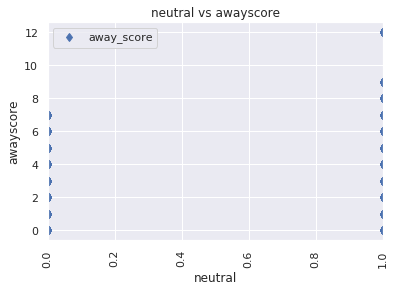

In [31]:
df_merge.plot(x = 'neutral_num', y = 'away_score',style = 'd')
plt.xlabel('neutral')
plt.xticks(rotation=90)
plt.ylabel('awayscore')
plt.title('neutral vs awayscore')
plt.show()

**Linear regression**

From the scatter plot, the data does not appear to be linear. So if were to fit a simple linear straight line, it would not cover most of the points. Which is why applying Linear regression on this dataset would not give us the correct value.

The other alternative we are left with is applying polynomial regression.

In [0]:
#for predicting a response using a single feature. 
#It is assumed that the two variables are linearly related.
#hence we will not use linear regression since we are dealing with more than one dependent and independent variables.

In [33]:
#checking for any null values in our x
x.isnull().any().sum()

0

In [34]:
#checking for any null values in our y

y.isnull().any().sum()

0

In [35]:
x.tail()

,rank,result_num,neutral_num
212826,206,2,1
212827,206,2,1
212828,206,2,1
212829,206,2,1
212830,206,2,1


In [36]:
y.tail()

,home_score
212826,4
212827,4
212828,4
212829,4
212830,4


In [0]:
#splitting the dataset into train and test set 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size = 0.2,random_state = 0)

In [38]:
#fitting into a linear regression
from sklearn.linear_model import LinearRegression
reg_line = LinearRegression()
reg_line.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
#To retrieve the intercept:
print(reg_line.intercept_)
#For retrieving the slope:
print(reg_line.coef_)

[0.27409659]
[[2.91235432e-05 1.11087832e+00 1.38420474e-01]]


this means that for a unit change in the homescore there is an insignificant change in the hometeam, awayteam and tournament.
the same applies for the awayscore.
we realise that the most sinificant columns to work with is the rank which have a 2.33992146e-05 influence on rank and 1.03945622e+00 influence on the team result, whereas a 8.42469786e-02 influence on the neutral.

In [40]:
#making predictions
y_pred = reg_line.predict(x_test )
y_pred

array([[2.63937032],
       [0.41408974],
       [1.38506228],
       ...,
       [2.49995965],
       [2.49902769],
       [2.49629008]])

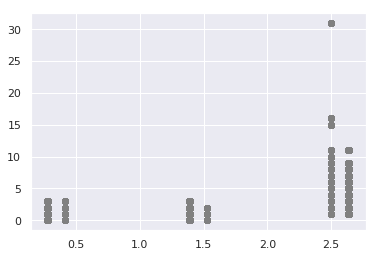

In [41]:
plt.scatter(y_pred, y_test,  color='gray')
plt.show()

the predicted values and the test sets are far wide apart hence linear regression is not the best model to use.

In [42]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, y_pred))
rms

1.7654272278479874

indicates the absolute fit of the model to the data–how close the observed data points are to the model’s predicted values.

**Polynomial regression**

In [0]:
#we have two independent variables; home team and away team
#this prompts us to do our polynomial regression twice with each of the variables.

In [0]:
#we will first start with home score as our x

*prediction for the home team rank*

In [0]:
# Let's apply polynomial regression
#
one = df_merge['rank'].values.reshape(-1,1)
two = df_merge['home_score'].values


In [0]:
#splitting the dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(one, two, test_size = 0.2, random_state=0)



In [47]:
# We then fit Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 6)
x_poly = poly_reg.fit_transform(one)
pol_reg = LinearRegression()
pol_reg.fit(x_poly, two)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

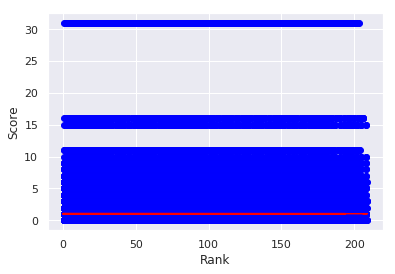

In [102]:
#
# Running the prediction
y_pred = pol_reg.predict(x_poly)
y_pred
#
#Visualize the Polynomial Regression results
plt.scatter(x.iloc[:,0], y.iloc[:,0], color='blue')
plt.plot(x, pol_reg.predict(x_poly), color='red')
plt.xlabel('Rank')
plt.ylabel('Score')
plt.show()
#


In [49]:
# measuring the accuracy of our model using RMSE
from sklearn.metrics import mean_squared_error
#
rmse = np.sqrt(mean_squared_error(y, y_pred))
#
print(rmse)

1.9699959792980182


*Prediction for the away team scores*

In [0]:
# Let's apply polynomial regression
#
one = df_merge['rank'].values.reshape(-1,1)
two = df_merge['away_score'].values


In [0]:
#splitting the dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(one, two, test_size = 0.2, random_state=0)



In [52]:
# We then fit Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(one)
pol_reg = LinearRegression()
pol_reg.fit(x_poly, two)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

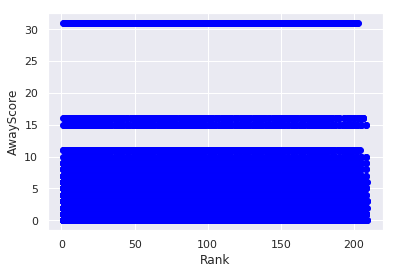

In [53]:
# Running the prediction
y_pred = pol_reg.predict(x_poly)
y_pred
#
#Visualize the Polynomial Regression results

plt.scatter(x.iloc[:,0], y.iloc[:,0], color='blue')
#plt.scatter(x.iloc[:,0],y)
plt.plot(xdate= pol_reg.predict(x_poly), color='red')
plt.xlabel('Rank')
plt.ylabel('AwayScore')
plt.show()
#


In [54]:
# measuring the accuracy of our model using RMSE
from sklearn.metrics import mean_squared_error
#
rmse = np.sqrt(mean_squared_error(y, y_pred))
#
print(rmse)

2.069865950870501


**Logistic Regression**

Logistic regression attempts to predict an outcome (a win or a loss) given a set of data points (stats) that likely influence that outcome.

*Prediction for home scores*

In [0]:
y = df_merge[['home_score']]
x = df_merge[['rank','result_num','neutral_num']]


In [0]:
#splitting the dataset into train and test set 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size = 0.2,random_state = 0)

In [57]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
score = logreg.score(x_train, y_train)
score2 = logreg.score(x_test, y_test)

print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training set accuracy:  0.384
Test set accuracy:  0.383


*Prediction for away scores*

In [0]:
y = df_merge[['away_score']]
x = df_merge[['rank','result_num','neutral_num']]


In [0]:
#splitting the dataset into train and test set 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size = 0.2,random_state = 0)

In [105]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
score = logreg.score(x_train, y_train)
score2 = logreg.score(x_test, y_test)

print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training set accuracy:  0.425
Test set accuracy:  0.424
